# SVM 하드마진
인공 데이터의 종류　선형, 원형（Circle）, 초승달형（Moon）을 다룬다.<br>
선향분류와 커널함수를 이용한 비선형분리<br>
sklearn.svm.SVC　http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification, make_circles, make_moons 

# 산점도로 독자적인 컬러맵을 사용
from matplotlib.colors import ListedColormap 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

FLAG_fig = False

2클래스(0, 1)의 데이터 생성，상세한 내용은 다음을 참조  
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [43]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=2.0, #　클수록 클래스 분리의 거리가 커진다 
                            shift=None, 
                            random_state=5) # 정수가 주어지면 난수의 재현성이 있다
X[:,0]

array([ 4.01126164,  5.43249432,  0.00629779, -1.51295161,  4.59520546,
        0.4821708 ,  4.55642854,  0.0840107 ,  3.8949618 , -1.17219654,
        6.17885479,  3.23639999,  3.34071395, -1.07480112, -0.81837429,
        2.49666768, -0.38120179, -0.28804816,  0.4130404 ,  4.42585529,
       -1.19640551,  0.02689505,  0.11157303, -0.0298695 ,  3.29926257,
       -0.08070849,  2.67869012,  3.76474318, -1.52272883,  4.72324913,
       -0.8325025 , -0.3540401 , -0.45793958,  0.11901545, -0.41030964,
       -0.27880854,  1.75260861, -0.69227037,  3.10640805, -1.55921457,
        1.83992436,  5.22107194, -0.39171344, -0.57584308,  4.4358702 ,
        2.50568363,  2.54215754,  2.81458916,  3.18527997, -0.37771365,
        4.75073679, -0.81387167, -0.3587133 ,  3.87735703, -0.54608426,
        3.03977563,  5.00365668,  4.55518859,  0.56702719,  0.75640408,
        0.1621152 ,  3.84315052,  3.42412808,  4.04811185, -0.57597875,
       -0.33763724, -0.65614123,  3.5729591 ,  0.09952437,  4.63

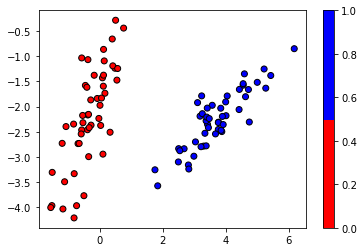

In [31]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=2.0, #　클수록 클래스 분리의 거리가 커진다 
                            shift=None, 
                            random_state=5) # 정수가 주어지면 난수의 재현성이 있다
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
if FLAG_fig: plt.savefig('fig_SVM_HM_LN_01.png')
plt.show()

smv.SVC 의 도큐먼트  
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  
http://scikit-learn.org/stable/modules/svm.html

In [36]:
clf = svm.SVC(kernel='linear', C=1000) # clf : classification의 약어, 선형커널（내적)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

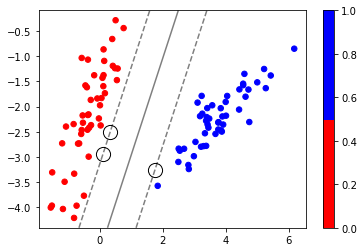

In [44]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # c=y, y가 나타내는 레이블 0, 1로 분류
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 초평면까지의 거리를 구하고，다음 그리드에 맞추어 reshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape) 
# 마진의 경계선과 초평면을 등고선으로 그린다
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #등고선의 수와 간격을 levels로 지정
           linestyles=['--', '-', '--'])
# 서포트 벡터를 흰색의 원으로 그린다
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_HM_LN_02.png')
plt.show()

In [45]:
testX=np.array([[1.0, -3.0], [1.0, -2.5]]) # 새로운 데이터
judge = clf.predict(testX)
judge

array([1, 0])

Circles　원형 데이터의 생성　
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

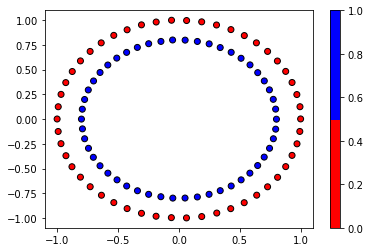

In [47]:
X, y = make_circles(noise = 0.001, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
if FLAG_fig: plt.savefig('fig_SVM_HM_CIR_01.png')
plt.show()

In [48]:
clf = svm.SVC(kernel='rbf', C=1000) # 가우시언 커널
clf.fit(X, y)

SVC(C=1000)

In [51]:
clf.support_vectors_

array([[ 0.96821883,  0.24801111],
       [-0.42560829,  0.90310138],
       [-0.99120718,  0.12474741],
       [ 0.72789841,  0.68433798],
       [ 0.3105811 , -0.95044541],
       [ 0.80843532,  0.58724742],
       [ 0.99907184,  0.00149072],
       [-0.92796413, -0.37041869],
       [-0.63637601, -0.77026329],
       [-0.06226853, -0.99682947],
       [ 0.06284089,  0.99664652],
       [-0.87604272,  0.48112403],
       [ 0.92868745, -0.36714044],
       [ 0.72780942, -0.68498364],
       [ 0.79429633, -0.10200965],
       [ 0.58353533,  0.54804583],
       [-0.05217313,  0.79986622],
       [-0.70294593, -0.38654052],
       [ 0.15116737, -0.78783536],
       [ 0.74392512, -0.29532921],
       [-0.74449397,  0.29463297],
       [-0.24855675,  0.76227072],
       [-0.64790637,  0.47136603]])

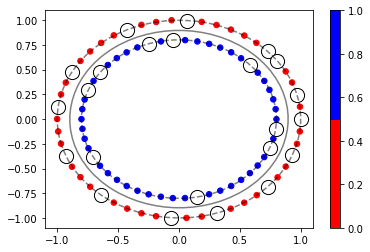

In [50]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # y는，레이블 0, 1이 있고，이에 따라 색을 구분
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #초평면까지의 거리를 구하고, 다음에 그리드에 맞추어 reshape((30,30))
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], #등고선의 수와 간격을 levels로 지정
           alpha=0.5, linestyles=['--', '-', '--'])
# 서포트 벡터를 하얀색 원으로 그린다
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_HM_CIR_02.png')
plt.show()

Moons 초승달 형태의 데이터 생성　http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

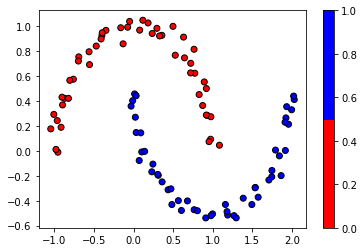

In [52]:
X, y = make_moons(noise = 0.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
if FLAG_fig: plt.savefig('fig_SVM_HM_MO_01.png')
plt.show()

In [53]:
clf = svm.SVC(kernel='poly', degree=3, coef0=1.0, C=1000) # 다항식 커널
clf.fit(X, y)

SVC(C=1000, coef0=1.0, kernel='poly')

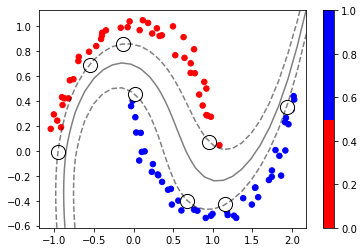

In [57]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # y는，레이블 0, 1이 있고，이에 따라 색을 구분
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #초평면까지의 거리를 구하고, 다음에 그리드에 맞추어 reshape((30,30))
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #등고선의 수와 간격을 levels로 지정
           linestyles=['--', '-', '--'])
# 서포트 벡터를 하얀색 원으로 그린다
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_HM_MO_02.png')
plt.show()

# SVM 소프트마진
sklearn.model_selection.train_test_split http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
sklearn.metrics http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  

matplotlib의 컬러맵을 사용
https://matplotlib.org/users/colormaps.html

In [58]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlib의 컬러맵을 사용
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import   accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification

FLAG_fig = False

In [59]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=0.4, #　클수록 클래스 분리 거리가 크다 
                            shift=None, 
                            random_state=5) # 정수가 주어지면 난수의 재현성이 있다

In [67]:
X

array([[ 1.1362296 , -0.32985366],
       [ 2.55746228,  0.46689347],
       [ 0.33126575, -0.12357246],
       [-1.18798365, -1.45384073],
       [ 1.72017342,  0.49962649],
       [ 0.80713876,  0.61115122],
       [ 1.6813965 ,  0.27485234],
       [ 0.40897866,  0.42061649],
       [ 1.01992976, -0.34465718],
       [-0.84722858, -2.17984567],
       [ 3.30382276,  0.99857365],
       [ 0.36136795,  0.06264582],
       [ 0.46568191, -0.67875811],
       [-0.74983316, -0.54543132],
       [-0.49340633, -2.35702522],
       [-0.37836436, -1.2470327 ],
       [-0.05623383, -0.31622229],
       [ 0.0369198 , -0.01723722],
       [ 0.73800836,  0.65845309],
       [ 1.55082326, -0.20837084],
       [-0.87143755, -0.87827904],
       [ 0.35186301, -0.52332717],
       [ 0.43654099,  0.25517751],
       [ 0.29509846, -0.38440409],
       [ 0.42423053, -0.9330361 ],
       [ 0.24425947,  0.01147156],
       [-0.19634192, -0.98534779],
       [ 0.88971114, -0.60386553],
       [-1.19776087,

#### 훈련 데이터와 테스트 데이터의 분리（split）
sklearn.model_selection.train_test_split  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

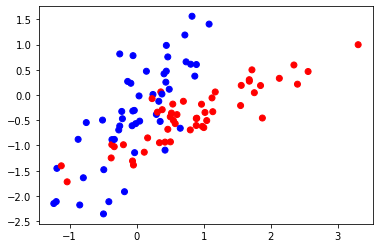

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 트레이닝 80%
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)
if FLAG_fig: plt.savefig('fig_SVM_SM_Train.png')
plt.show()

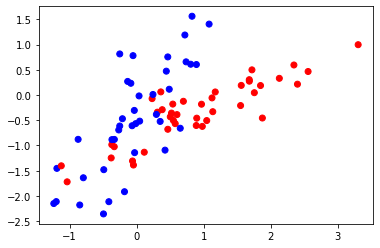

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 트레이닝 80%
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm.bwr)
if FLAG_fig: plt.savefig('fig_SVM_SM_Train.png')
plt.show()

In [72]:
clf = svm.SVC(kernel='linear', C=10000) # C의 값이 크더라도，가능하면 다른 클래스가 섞이는 것을 허용하지 않는다
clf.fit(X_train, y_train)

SVC(C=10000, kernel='linear')

In [78]:
a = np.linspace(0, 1, 30)
b = np.linspace(0, 1, 30)
np.meshgrid(a, b)

[array([[0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
         0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
         0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
         0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
         0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
         0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ],
        [0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
         0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
         0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
         0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
         0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
         0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ],
        [0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
         0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
         0.34482759, 0.37931034,

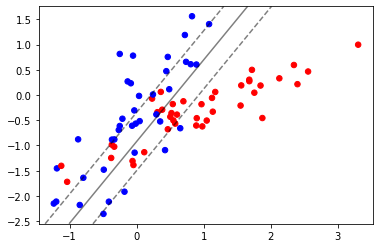

In [77]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, c=y_train, cmap=cm.bwr)
# plot hyper-plane and margin liness as the lines
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate the lines
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 초평면까지의 거리를 구한 다음 그리드에 맞추어 reshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape)
# 마진의 경계선과 초평면을 등고선으로 그린다
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #등고선의 수와 간격을 levels로 지정
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_SM_Train_Result.png')
plt.show()

#### 훈련 데이터에 대한 평가

In [82]:
y_train[0:10]
print('훈련 데이터　정답률', clf.score(X_train, y_train))   

훈련 데이터　정답률 0.8


In [83]:
y_train_pred = clf.predict(X_train)
print("예측값: %s" % y_train_pred)
print("실제값　: %s" % y_train)

예측값: [0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1]
실제값　: [0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 0 1 1]


훈련 데이터에 대한 평가，아래의 accuracy 와 위의 clf.score()는 동일한 계산

In [84]:
print('confusion = \n %s' % confusion_matrix(y_train, y_train_pred)) # 혼동행렬
print('accuracy = %f ' % accuracy_score(y_train, y_train_pred))  # 정답률
print('precision = %f ' % precision_score(y_train, y_train_pred)) # 적합률
print('recall = %f ' % recall_score(y_train, y_train_pred)) # 재현률
print('F-measure = %f' % f1_score(y_train, y_train_pred)) # F-값

confusion = 
 [[32  7]
 [ 9 32]]
accuracy = 0.800000 
precision = 0.820513 
recall = 0.780488 
F-measure = 0.800000


클래스 0의 오인식은 39개 중 7개, 클래스 1의 오인식은 41개 중 9개

In [16]:
print( classification_report(y_train, y_train_pred)) # 정답률（accuracy）은 avg/total

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.82      0.78      0.80        41

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



위의 결과를 보면，"0", "1"은 클래스명으로，각각의 입장에서의 평가지표를 나타내고 있다.
위의 하나하나의 평가에서는，"1"의 입장에서 보는 것과 동일하다. 또한 F-measureとf1-score는 동일한 양을 나타낸다.

#### 테스트 데이터에 대한 평가

In [85]:
y_test_pred = clf.predict(X_test)
print("예측값: %s" % y_test_pred)
print("실제값　: %s" % y_test)

예측값: [0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1]
실제값　: [1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1]


In [86]:
print('테스트 데이터　　　　　정답률', clf.score(X_test, y_test))   
print('confusion = \n %s' % confusion_matrix(y_test, y_test_pred))
print('accuracy = %f ' % accuracy_score(y_test, y_test_pred))
print('precision = %f ' % precision_score(y_test, y_test_pred))
print('recall = %f ' % recall_score(y_test, y_test_pred))
print('F-measure = %f' % f1_score(y_test, y_test_pred))

테스트 데이터　　　　　정답률 0.9
confusion = 
 [[10  1]
 [ 1  8]]
accuracy = 0.900000 
precision = 0.888889 
recall = 0.888889 
F-measure = 0.888889


In [87]:
print( classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



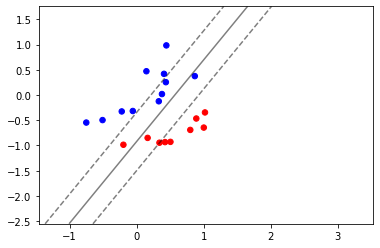

In [88]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=30, c=y_test, cmap=cm.bwr)
ax = plt.gca() # get current axis
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,            linestyles=['--', '-', '--'])
if FLAG_fig: plt.savefig('fig_SVM_SM_Test.png')
plt.show()

# 교차검증법(Cross Validation)
#### 2클래스를 대상으로 함
3.1. Cross-validation: evaluating estimator performance  
http://scikit-learn.org/stable/modules/cross_validation.html  
  
3.3.1. The scoring parameter: defining model evaluation rules  
http://scikit-learn.org/stable/modules/model_evaluation.html  
  
sklearn.model_selection.cross_val_score  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

sklearn.model_selection.cross_validate<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html<br>
사용 방법 예<br>
http://scikit-learn.org/stable/modules/cross_validation.html<br>
평가지표<br>
http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

cross_val_score 분할 방법은 다음 URL을 참조  
wiki cross-validation (statistics)  https://en.wikipedia.org/wiki/Cross-validation_(statistics)   
4번의 계산（훈련과 테스트）에서，
1번째는，후반 3/4을 훈련 데이터，전반 1/4을 테스트 데이터로 사용한다.　　
2번째 이후는 이 테스트 데이터가 차례대로 이동한다.
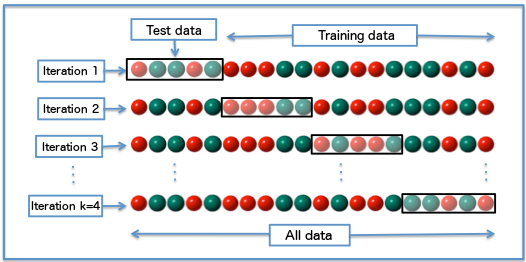

In [89]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlib의 컬러 맵을 사용
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

FLAG_fig = False

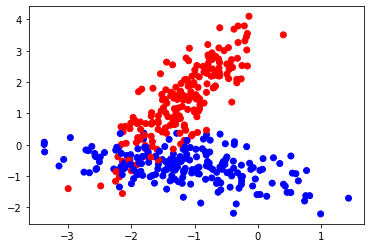

In [90]:
Num = 400 # 전체 샘플수
CV = 5    # 샘플수를 CV(Cross Validation)만으로 분할한다
X, y = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　분리표
                            shift=None, 
                            random_state=5) # 난수의 재현성
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)
if FLAG_fig: plt.savefig('fig_SVM_CrossValid_01.png')
plt.show()

In [91]:
clf = svm.SVC(kernel='linear', C=1)

#### cross_val_score
평가지표는 1종만으로 지정할 수 있다. 또한，데이터 분할을 변경하여 평가지표를 출력한다.

In [4]:
scores = cross_val_score(clf, X, y, cv=CV, scoring='accuracy') # (분류모델, 변수 데이터, 라벨 데이터, 분할 수, 평가지표)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f) for 95 %% confidence interval" % (scores.mean(), scores.std() * 2))

[0.8625 0.95   0.9375 0.8875 0.9125]
Accuracy: 0.91 (+/- 0.06) for 95 % confidence interval


#### cross_val_validate
평가지표를 여러 개 지정할 수 있다. 각 시행의 평균값을 최종 결과로서 출력한다.

In [92]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(clf, X, y, scoring=scoring, cv=CV)
for key,value in scores.items():
    print("{:16}:{:.2f}+/-{:.2f}".format(key, value.mean(), value.std()))

fit_time        :0.00+/-0.00
score_time      :0.00+/-0.00
test_accuracy   :0.91+/-0.03
test_precision  :0.95+/-0.03
test_recall     :0.86+/-0.04
test_f1         :0.91+/-0.03


주의：평균값 +/- 를 신뢰구간이라고 말하는 것은，지표가 정규분포 또는 t분포를 따른다는 가정에 의한 것이다.

# GridSerach의 사용예
sklearn.model_selection.GridSearchCV  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

3.2. Tuning the hyper-parameters of an estimator
http://scikit-learn.org/stable/modules/grid_search.html#grid-search  

Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks <br>
https://rasbt.github.io/mlxtend/
- Plotting Decision Regions https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [95]:
!pip3 install mlxtend

In [96]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlib의 컬러맵을 사용
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from mlxtend.plotting import plot_decision_regions #결정영역의 그래프，외부 라이브러리를 이용
#위의 설치는 Anaconda와는 별도로 필요
FLAG_fig = False

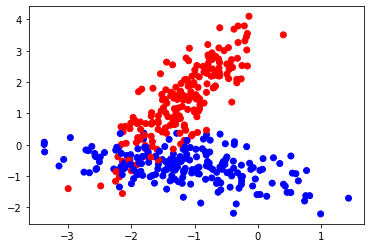

In [97]:
Num = 400 # 전체 샘플수
CV = 5    # 샘플수를 CV(Cross Validation)만으로 분할한다
X, y = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　분리수
                            shift=None, 
                            random_state=5) # 난수의 재현성
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)
#if FLAG_fig: plt.savefig('fig_SVM_GridSearch_01.png')
plt.show()

In [98]:
# 그리드 서치용의 파라미터 설정
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1.0, 10.0], 'gamma':[0.01, 0.1, 1.0, 10.0]}
svc = svm.SVC()

C는 소프트 마진으로 이용하는 C의 값을 나타냄.

In [99]:
# 그리드 서치의 실행
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=CV)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [100]:
# 최적 파라미터의 표시
print('Best accuracy = ',clf.best_score_)
print(clf.best_params_)

Best accuracy =  0.925
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


C는 10.0, gamma는 1.0, kernel은 rbf 가 최적이라고 표시.

In [101]:
# 최적 파라미터에 의한 식별기를 전체 데이터에 적용，테스트 데이터는 뒤에 기술
best_clf = clf.best_estimator_
pred = best_clf.predict(X)

print('Accuracy score = ',accuracy_score(y, pred))
print(classification_report(y, pred))

Accuracy score =  0.94
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       200
           1       0.96      0.92      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



#### 새로운 테스트 데이터의 작성
이번에는 make_classification을 이용하여，데이터를 발생시키고，테스트 데이터로 이용한다.

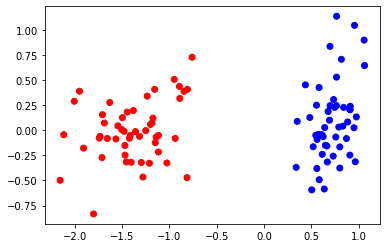

In [102]:
Num = 100 # 추가 샘플수
X_test, y_test = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　분리도
                            shift=None, 
                            random_state=1) # 다른 확률과정
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm.bwr)
#if FLAG_fig: plt.savefig('fig_SVM_GridSearch_02.png')
plt.show()

In [103]:
y_test_pred = best_clf.predict(X_test) # y_test에 대한 prediction

print('Accuracy score = ',accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy score =  0.74
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        50
           1       1.00      0.48      0.65        50

    accuracy                           0.74       100
   macro avg       0.83      0.74      0.72       100
weighted avg       0.83      0.74      0.72       100



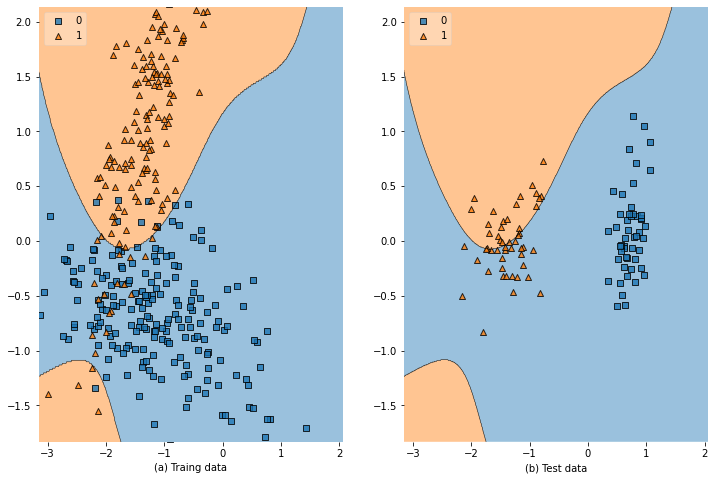

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharex=True, sharey=True)
plot_decision_regions(X,y, clf=best_clf,            res=0.02, ax=axes[0], legend=2)
axes[0].set_xlabel('(a) Traing data')

plot_decision_regions(X_test, y_test, clf=best_clf, res=0.02, ax=axes[1], legend=2)
axes[1].set_xlabel('(b) Test data')

if FLAG_fig: plt.savefig('fig_SVM_GridSearch_Result.png')
plt.show()

# SVM 멀티클래스 분류，Iris

In [105]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from sklearn.svm import SVC
#from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

from mlxtend.plotting import plot_decision_regions #결정영역의 그래프，외부 라이브러리를 이용

FLAG_fig = False

iris 데이터 중에，sepal（꽃받침）과 petal（꽃잎）의 길이[cm]에 의한 클래스를 분류를 수행한다.  
iris.data의 0번째와 2번째 요소만을 추출하여 X의 배열(150 x 2)에 저장    
클래스(꽃잎의 종류 0:Iris-Setosa, 1:Iris-Versicolour, 2:Iris-Virginica)를 y(150 x 1)에 저장

In [110]:
iris.data
# iris.target

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [106]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [107]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

가우시안 커널로 ovr(one-vs-rest) 과 ovo(one-vs-one)의 비교를 수행한다  
디폴트로 decision_function_shape='ovr'이지만，일부러 명시적으로 지정

#### 일대다

In [114]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovr').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5)
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



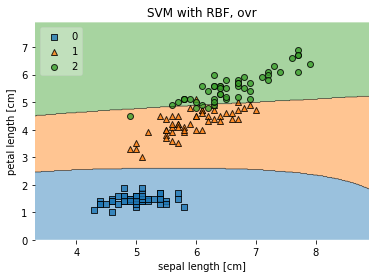

In [112]:
plot_decision_regions(X,y, clf=clf, res=0.02, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovr')
plt.show()

decision_function_shape='ovo'으로 한다

#### 일대일

In [115]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5, decision_function_shape='ovo')
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



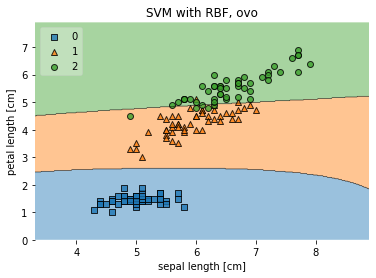

In [116]:
plot_decision_regions(X,y, clf=clf, res=0.02, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovo')
plt.show()

ovr과 ovo는，별로 차이가 없는 것이 확인된다

다음，그리드 서치를 이용하여，iris 데이터에 대한 가장 좋은 클래스 분류기를 구한다

In [117]:
# 그리드 서치를 이용하여 파라미터를 설정
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}
svm = SVC()

In [118]:
# 그리드 서치를 실행
clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5) #교차검증의 데이터 분할을 5로 했다
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

In [119]:
# 가장 좋은 파라미터를 표시
print('Best accuracy =', clf.best_score_)
print(clf.best_params_)

Best accuracy = 0.9666666666666668
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 10.0, 'kernel': 'poly'}


다항식 커널로，  
decision_function_shape='ovo' 방식이 'ovr'보다도 식별 정확도가 높은 결과를 얻는다

Accuracy = 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



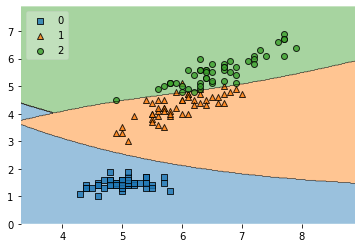

In [124]:
# 최적 파라미터에 의한 식별기를 전체 데이터에 적용，테스트 데이터는 뒤에 기술
bst_clf = clf.best_estimator_
y_est = bst_clf.predict(X)
print('Accuracy =', accuracy_score(y, y_est))
print(classification_report(y, y_est))
plot_decision_regions(X,y, clf=bst_clf, res=0.02, legend=2)
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_01.png')
plt.show()

위의 클래스를 보면，분류하는 결정영역이 너무 복잡하여 사용하기 어렵게 느껴지면，결정영역을 직선으로 구성하는 선형 커널도 시험해보기 바랍니다

#### 4개의 설명변수를 이용한다
SVC 파라미터의 결정 방법은，장래에는 새롭게 GridSearch를 적용하지만, 여기에서는 위의 Grid Search 결과를 따른다.

In [125]:
X = iris.data
y = iris.target
clf = SVC(C=0.1, kernel='poly', gamma=10.0, decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.1, decision_function_shape='ovo', gamma=10.0, kernel='poly')
Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



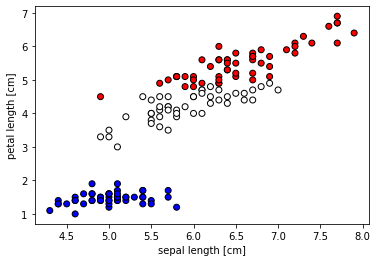

In [126]:
plt.scatter(X[:,0],X[:,2], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_02.png')
plt.show()

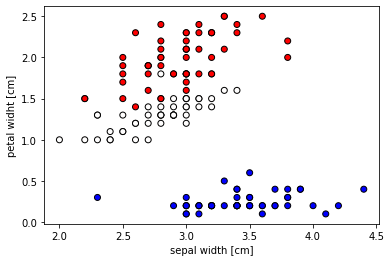

In [127]:
plt.scatter(X[:,1],X[:,3], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal widht [cm]')
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_03.png')
plt.show()

# 필기체 숫자의 식별을 SVM을 이용하여 수행한다
참고 Recognizing hand-written digits　<br>
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [129]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

FLAG_fig = False

**Load Data ** <br>
handwritten digits 0-9<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
<br>Each datapoint is a 8x8 image of a digit.<br>
Classes	10<br>
Samples per class	~180<br>
Samples total	1797<br>
Dimensionality	64<br>
Features	integers 0-16

In [132]:
# import digit data form sklearn datasets,
digits = datasets.load_digits() #load data
print('size =', digits.data.shape)

size = (1797, 64)


이미지 데이터를 이미지，사이즈，수치로 간주한다. 주의할 것은，데이터 배열의 처음 0-9번째는 필기체 숫자가 0-9의 차례로 저장되어 있지만，이이 이후는 차례대로로 저장되어 있지 않다.

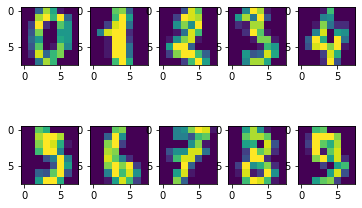

(8, 8)
[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


In [3]:
counter = 1
for i in range(0,10): #적절한 범위를 지정
    plt.subplot(2,5,counter)
    counter += 1
    plt.imshow(digits.images[i])

if FLAG_fig: plt.savefig('fig_SVM_MClass_DHand_01.png')
plt.show()
# 이미지 데이터의 포맷을 살펴본다
print(digits.images[0].shape) #적절한 번호를 지정
print(digits.images[100])     #위와 동일

In [133]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# 그리드 서치용의 파라미터를 설정
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}

In [134]:
svm = SVC()
# 그리드 서치를 실행
clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [135]:
# 최적 파라미터를 실행
print('Accuracy =', clf.best_score_)
print(clf.best_params_)

Accuracy = 0.9789741237625653
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'linear'}


In [136]:
y_test_pred = clf.predict(X_test)
print("Accuracy Score = %f \n" % accuracy_score(y_test, y_test_pred))
print("Classification report for classifier \n %s"  % classification_report(y_test, y_test_pred))

Accuracy Score = 0.977778 

Classification report for classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       0.95      1.00      0.98        21
           6       1.00      0.96      0.98        25
           7       1.00      0.95      0.97        20
           8       1.00      0.96      0.98        23
           9       1.00      0.96      0.98        24

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



아래에서，dat = np.array([X_test[id]]) 로 하여，실행하는 이유는，scikit-learn의 ver 0.19부터 1차원 배열을 넘기는 것이 금지되어 있기 때문에，외관상，2차원 배열처럼 보이기 때문이다. 이렇게 하지 않고，clf.predict(X_test[id])로 하면，다음 경고가 표시된다.
DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

Predicted Number is 6 
Real      Number is 6 


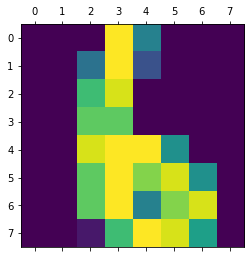

In [139]:
# id로 지정한 데이터로부터 추정한 숫자를 살펴본다
id=15
dat = np.array([X_test[id]])
print("Predicted Number is %d " % clf.predict(dat))
print("Real      Number is %d " % y_test[id])

plt.matshow(X_test[id].reshape(8,8))
if FLAG_fig: plt.savefig('fig_SVM_MClass_DHand_02.png')
plt.show()

# kNN
k최근접 이웃법（k-nearest neighbors algorithm）  
1.6. Nearest Neighbors http://scikit-learn.org/stable/modules/neighbors.html<br>
sklearn.neighbors.KNeighborsClassifier http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
거리의 종류 http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [140]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm # maplotlibの의 커널 맵을 이용

from sklearn.neighbors import KNeighborsClassifier

FLAG_fig = False

In [141]:
X = np.array([ [-3.0, -2.0], [-2.0, -1.0], [-1.0, -1.0], [1.0, 1.0], [2.0, 1.0], [3.0, 2.0]])
y = np.array([0, 0, 1, 1, 1, 1])

In [142]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

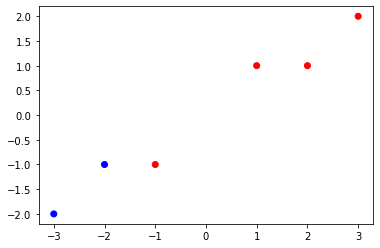

In [143]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)

if FLAG_fig: plt.savefig('fig_kNN_Exam_1.png')
plt.show()

In [144]:
X_test = np.array([ [-1.5, -1.0], [0.0, 0.5]])
print('Estimated class: ', neigh.predict(X_test))

Estimated class:  [0 1]


In [145]:
distances, indices = neigh.kneighbors(X_test)
print('Nearest index \n',indices)
print('Distance \n',distances)

Nearest index 
 [[1 2 0]
 [3 2 4]]
Distance 
 [[0.5        0.5        1.80277564]
 [1.11803399 1.80277564 2.06155281]]


# kNN iris 데이터의 분류

In [146]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.model_selection import train_test_split

FLAG_fig = False

#### X는 2차원
iris 변량 내에，sepal（꽃받침）과 petal（꽃잎）의 길이 [cm]를 보기 위해
0번째와 2번째 데이터를 X에 저장

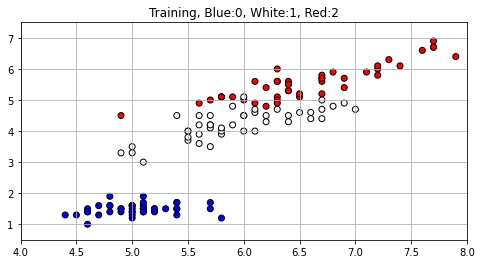

In [147]:
# Load iris data, 150 sample
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/15, random_state=123)

fig = plt.subplots(figsize=(8,4))
plt.xlim(4.0, 8.0)
plt.ylim(0.5, 7.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm.bwr, edgecolors='k')
plt.title('Training, Blue:0, White:1, Red:2')
plt.grid()

if FLAG_fig: plt.savefig('fig_kNN_Iris_1.png')
plt.show()

Accuracy = 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



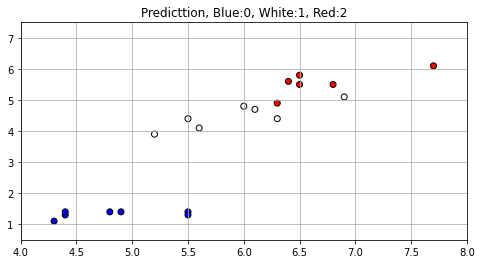

Accuracy = 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



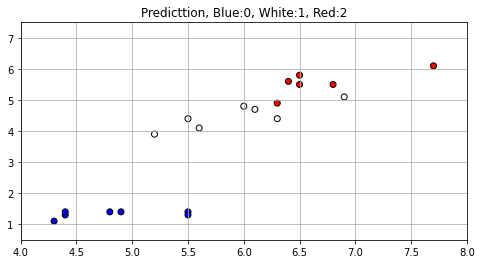

Accuracy = 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



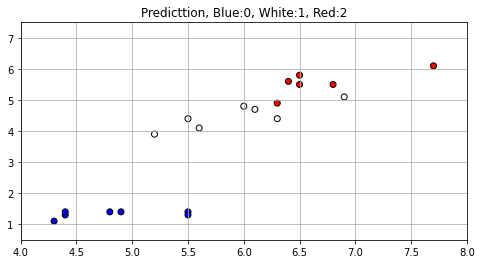

In [148]:
k_range=(3, 7, 9)
for k in k_range:
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    y_test_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print('Accuracy =',acc)
    print(classification_report(y_test, y_test_pred))
    
    fig = plt.subplots(figsize=(8,4))
    plt.xlim(4.0, 8.0)
    plt.ylim(0.5, 7.5)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred, cmap=cm.bwr, edgecolors='k')
    plt.grid()
    plt.title('Predicttion, Blue:0, White:1, Red:2')
    
    if FLAG_fig: plt.savefig('fig_kNN_Iris_2.png') #결과가 변하지 않기 때문에，마지막 그림을 출력
    plt.show()

어느 데이터가 잘못되었는가를 조사한다.

In [149]:
print('Real       =',y_test)
print('Prediction =',y_test_pred)

Real       = [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0]
Prediction = [2 2 2 1 0 1 1 0 0 1 1 0 1 2 2 2 0 0 1 0]


In [150]:
#위의 그래프와 비교하여 ｋNN의 성능을 추측한다.
print('  0:',X_test[0],'\n  5:',X_test[5],'\n 10:',X_test[10])

  0: [6.3 4.9] 
  5: [6.  4.8] 
 10: [6.9 5.1]


#### 설명변수의 특징량을 4차원（전부）으로 하여，kNN을 실행
다만，split할 때에 random_state를 생략하기 때문에，시행마다 훈련 데이터와 테스트 데이터의 성질이 다르다.

In [163]:
# random_state be not set. random division
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=2/15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

(130, 4) (130,)
(20, 4) (20,)


KNeighborsClassifier(n_neighbors=3)

In [164]:
y_test_predt = neigh.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
print('Accuracy =',acc)
print('Real       =',y_test)
print('Prediction =',y_test_pred)

Accuracy = 0.35
Real       = [2 2 1 0 0 1 0 2 1 0 1 1 2 1 1 1 1 1 1 0]
Prediction = [2 2 2 1 0 1 1 0 0 1 1 0 1 2 2 2 0 0 1 0]


결과는 충분히 변한다.